# PySpark - Read, Write and Validate
* Notebook by Adam Lang
* Date: 12/30/24

# Overview
* In this notebook we will go over how to do the following in PySpark:

1. Reading data
2. Partitioned files
3. Validating data
4. Specifying Data Types
5. Writing Data

## Create Spark Session

In [1]:
## create spark session
import pyspark
from pyspark.sql import SparkSession

## if you wanted to find spark on your system --- only works if running locally
## finds instance on local drives
#import findspark
#findspark.init()

## create spark session with appName
spark = SparkSession.builder.appName("SparkReadWriteVal").getOrCreate()
spark

Check the Spark "Cores"
* This is simply the "available threads to process partitions"

In [3]:
## check spark cores
cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
cores

1

Summary:
* Working locally or in google colab you will only have 1 core. If we were on DataBricks or another cloud enviornment we would have alot more.

# Standard Way to Read in Data in PySpark

In [4]:
## setup a path
path = "/content/drive/MyDrive/Colab Notebooks/PySpark Data Science/"

## first df
students = spark.read.csv(path+'students.csv',inferSchema=True, header=True)

## `.Show()` method
* In pyspark to show the full contents of the columns, you need to specify `truncate=False` to `show() method`.
  * Such as this: `.show(truncate=False)`

In [8]:
## show students df --> .show() is same as .head()
students.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|lunch       |test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|group B       |bachelor's degree          |standard    |none                   |72        |72           |74           |
|female|group C       |some college               |standard    |completed              |69        |90           |88           |
|female|group B       |master's degree            |standard    |none                   |90        |95           |93           |
|male  |group A       |associate's degree         |free/reduced|none                   |47        |57           |44           |
|male  |group C       |some college               |standard    |none                   |76        |78   

In [6]:
## another way to show this more "cleanly" using `toPandas'
## limits number of cols displayed on screen, if there are more cols there would be a "...." between cols
students.limit(4).toPandas()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [9]:
## also using .display()
display(students)

DataFrame[gender: string, race/ethnicity: string, parental level of education: string, lunch: string, test preparation course: string, math score: int, reading score: int, writing score: int]

# Parquet File Reading in PySpark
* Parquet files are the MOST COMMON BIG DATA file type as it is the most compact method for data storage, transport and processing.

In [10]:
## Reading 1 parquet file
parquet = spark.read.parquet(path+'users1.parquet')
parquet.limit(4).toPandas()

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 00:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,


## Multiple Parquet files
* You could have several 100 to thousand of these, so how do you do this?
* The wildcard or splat is used: `*`

In [11]:
## read mulitple parquet files
partitioned = spark.read.parquet(path+'users*')

In [12]:
## view in pandas
partitioned.limit(4).toPandas()

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 00:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,


In [13]:
## schema
partitioned.printSchema()

root
 |-- registration_dttm: timestamp (nullable = true)
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- cc: string (nullable = true)
 |-- country: string (nullable = true)
 |-- birthdate: string (nullable = true)
 |-- salary: double (nullable = true)
 |-- title: string (nullable = true)
 |-- comments: string (nullable = true)



## Specific parquet files
* Lets try files for user1 and user2 only.

In [14]:
## user1 and user2 only
users1_2 = spark.read.parquet(path+'users1.parquet',path+'users2.parquet')
users1_2.limit(4).toPandas()


,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 00:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,


In [15]:
## adding read.option -- partition on variable
users1_2 = spark.read.option("bathPath", path).parquet(path+'users1.parquet',path+'users2.parquet')
users1_2.limit(4).toPandas()

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 00:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,


## AWS Parquet File Reading
* This is a code block below that represents how to read a parquet file from an AWS S3 bucket

In [ ]:
## AWS parquet S3 bucket reading
bucket = "my_bucket"
key1 = "partition_test/Table1/CREATED_YEAR=2015/*" ## * is all sub-partitions
key2 = "partition_test/Table1/CREATED_YEAR=2017/*"
key3 = "partition_test/Table1/CREATED_YEAR=2018/*"

## example df
test_df = spark.read.parquet('s3://'+bucket+'/'+key1,\
                             's3://'+bucket+'/'+key2,\
                             's3://'+bucket+'/'+key3)

## show test_f
test_df.show(1)

# Validating Data in PySpark

Schema

In [16]:
## validate schemas in students df
students.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



Columns

In [17]:
## columns validation
students.columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

Describe
* This is NOT the same statistical method as in python pandas.

In [18]:
## describe()
students.describe()

DataFrame[summary: string, gender: string, race/ethnicity: string, parental level of education: string, lunch: string, test preparation course: string, math score: string, reading score: string, writing score: string]

data type

In [22]:
## dtypes of columns
students.schema['math score'].dataType

IntegerType()

data type for multiple columns

In [29]:
# Get the data types of 3 columns
#column_names = students.columns[:3]  # Get the first three column names
from pyspark.sql.functions import col
column_names = students.select(col('writing score'),col('reading score')).columns

for col_name in column_names:
    data_type = students.schema[col_name].dataType
    print(f"Column '{col_name}': {data_type}")


Column 'writing score': IntegerType()
Column 'reading score': IntegerType()


statistical summary for multiple columns
* This is more similar to python pandas function `.describe()`

In [31]:
## select multiple column summaries --- similar to pandas .describe()
students.select('math score', 'reading score').summary('count','min','max','mean').show()

+-------+----------+-------------+
|summary|math score|reading score|
+-------+----------+-------------+
|  count|      1000|         1000|
|    min|         0|           17|
|    max|       100|          100|
|   mean|    66.089|       69.169|
+-------+----------+-------------+



# Specify Data Types
* Spark is not great at inferring schemas. So you may have to set this yourself.
* The entire list of datatypes in pyspark:

1. Numeric Types:
  * ByteType: Represents a byte value.
  * ShortType: Represents a short integer.
  * IntegerType: Represents an integer.
  * LongType: Represents a long integer.
  * FloatType: Represents a single precision floating point number.
  * DoubleType: Represents a double precision floating point number.
  * DecimalType: Represents a fixed-precision decimal number.


2. String Type:
  * StringType: Represents a string value.

3. Binary Type:
  * BinaryType: Represents a byte array.

4. Boolean Type:
  * BooleanType: Represents a boolean value (true/false).

5. Datetime Types:
  * DateType: Represents a date without time.
  * TimestampType: Represents a timestamp.

6. Complex Types:
  * ArrayType: Represents an array of values.
  * MapType: Represents a map of key-value pairs.
  * StructType: Represents a structured type containing a sequence of fields.
  * StructField: Represents a field in a StructType.

Source: https://medium.com/@rganesh0203/list-of-data-types-in-pyspark-and-spark-sql-360b22934bc4

In [34]:
from pyspark.sql.types import* ## import all types

Using `StructField` to create specific data type schemas

In [35]:
## create customized data_schema --> list
data_schema = [StructField("name", StringType(), True),
               StructField("email", StringType(), True),
               StructField("city", StringType(), True),
               StructField("mac", StringType(), True),
               StructField("timestamp", DateType(), True),
               StructField("creditcard", StringType(), True)]

In [36]:
## Create a final `StructType`
final_struc = StructType(fields = data_schema)

In [37]:
## now read in JSON file
people = spark.read.json(path+'people.json', schema=final_struc)

In [38]:
## read in pandas view
people.limit(4).toPandas()

,name,email,city,mac,timestamp,creditcard
0,None,None,None,None,None,None
1,Keeley Bosco,katlyn@jenkinsmaggio.net,Lake Gladysberg,08:fd:0b:cd:77:f7,2015-04-25,1228-1221-1221-1431
2,Rubye Jerde,juvenal@johnston.name,None,90:4d:fa:42:63:a2,2015-04-25,1228-1221-1221-1431
3,Miss Darian Breitenberg,None,None,f9:0e:d3:40:cb:e9,2015-04-25,None


In [39]:
## schema
people.printSchema()

root
 |-- name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- city: string (nullable = true)
 |-- mac: string (nullable = true)
 |-- timestamp: date (nullable = true)
 |-- creditcard: string (nullable = true)



# Writing in Data to PySpark
* There are different types of write modes in PySpark, below is an example of `overwrite`.

1. `overwrite`
  * overwrites any existing data in a file.
  * if the file does not exist, it will be created.

2. `append`
  * appends the data to the file, preserving any existing data in the file.
  * if the file does not exist, it will be created.

3. `ignore`
  * writes data to the file only if the file does not already exist
  * if the file already exists, the write operation is ignored.

4. `error`
  * raises an error if the file already exists.







In [43]:
## students csv file
students.write.mode("overwrite").csv('write_test.csv')

However, Spark may partition the file into more than 1 part and the code below is how we can fix that

* The file will often be split up like this:



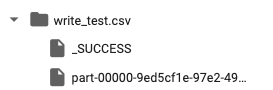

In [44]:
## how to overwrite file name when writing a file
from py4j.java_gateway import java_import
java_import(spark._jvm, 'org.apache.hadoop.fs.Path')

fs = spark._jvm.org.apache.hadoop.fs.FileSystem.get(spark._jsc.hadoopConfiguration())

## call on all parts of the file that may have been partitioned into more than 1 part
file = fs.globStatus(spark._jvm.Path('write_test.csv/part*'))[0].getPath().getName()
## rename the file
fs.rename(spark._jvm.Path('write_test.csv/' + file), spark._jvm.Path('write_test2.csv'))
## delete old fild
fs.delete(spark._jvm.Path('write_test.csv'), True)

True

Summary
* Now the file would be 1 complete file with the new name we gave it.

## Writing a Parquet File

In [45]:
## overwrite parquet file
users1_2.write.mode("overwrite").parquet('parquet/')

In [46]:
## partition parquet file -- choose a variable/variables to partition by
users1_2.write.mode("overwrite").partitionBy("gender").parquet('part_parquet/')

* The result of partitioning the above parquet file will look like this:

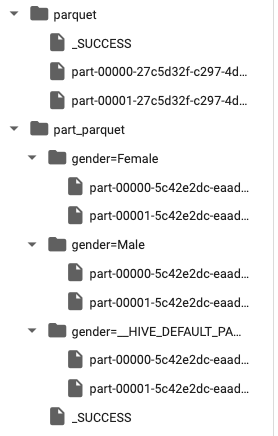

## Create custom df in pyspark

In [48]:
## create custom df
values = [('Pear',10),('Orange',13),('Peach',5),('Apple',15)]

## create spark df --> col names
df = spark.createDataFrame(values,['fruit','quant'])
df.show()

+------+-----+
| fruit|quant|
+------+-----+
|  Pear|   10|
|Orange|   13|
| Peach|    5|
| Apple|   15|
+------+-----+

